<a href="https://colab.research.google.com/github/VegetaSan1/Machine-Learning-Projects/blob/main/BITCOIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('bitcoin_price_Training - Training.csv')
test=pd.read_csv('bitcoin_price_1week_Test - Test.csv')

In [ ]:
train

,Date,Open,High,Low,Close,Volume,Market Cap
0,31-Jul-17,2763.24,2889.62,2720.61,2875.34,"86,05,75,000","45,53,58,00,000"
1,30-Jul-17,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"
2,29-Jul-17,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
3,28-Jul-17,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
4,27-Jul-17,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
...,...,...,...,...,...,...,...
1552,01-May-13,139.00,139.89,107.72,116.99,"2,31,46,600","1,54,28,20,000"
1553,30-Apr-13,144.00,146.93,134.05,139.00,"2,62,72,600","1,59,77,80,000"
1554,29-Apr-13,134.44,147.49,134.00,144.54,"2,28,77,200","1,49,11,60,000"
1555,28-Apr-13,135.30,135.98,132.10,134.21,"2,26,72,000","1,50,05,20,000"


In [ ]:
test

,Date,Open,High,Low,Close,Volume,Market Cap
0,07-Aug-17,3212.78,3397.68,3180.89,3378.94,"1,48,22,80,000","52,98,73,00,000"
1,06-Aug-17,3257.61,3293.29,3155.60,3213.94,"1,10,50,30,000","53,72,09,00,000"
2,05-Aug-17,2897.63,3290.01,2874.83,3252.91,"1,94,57,00,000","47,77,82,00,000"
3,04-Aug-17,2806.93,2899.33,2743.72,2895.89,"1,00,21,20,000","46,27,62,00,000"
4,03-Aug-17,2709.56,2813.31,2685.14,2804.73,"80,47,97,000","44,66,64,00,000"
5,02-Aug-17,2727.13,2762.53,2668.59,2710.67,"1,09,49,50,000","44,95,08,00,000"
6,01-Aug-17,2871.30,2921.35,2685.61,2718.26,"1,32,46,70,000","47,32,18,00,000"


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.3+ KB


In [ ]:
train.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [ ]:
train.isnull().sum()

Date          1
Open          1
High          1
Low           1
Close         1
Volume        1
Market Cap    1
dtype: int64

In [ ]:
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

In [ ]:
train

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"86,05,75,000","45,53,58,00,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
...,...,...,...,...,...,...,...
1552,2013-05-01,139.00,139.89,107.72,116.99,"2,31,46,600","1,54,28,20,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,"2,62,72,600","1,59,77,80,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,"2,28,77,200","1,49,11,60,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,"2,26,72,000","1,50,05,20,000"


In [ ]:
test

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-08-07,3212.78,3397.68,3180.89,3378.94,"1,48,22,80,000","52,98,73,00,000"
1,2017-08-06,3257.61,3293.29,3155.60,3213.94,"1,10,50,30,000","53,72,09,00,000"
2,2017-08-05,2897.63,3290.01,2874.83,3252.91,"1,94,57,00,000","47,77,82,00,000"
3,2017-08-04,2806.93,2899.33,2743.72,2895.89,"1,00,21,20,000","46,27,62,00,000"
4,2017-08-03,2709.56,2813.31,2685.14,2804.73,"80,47,97,000","44,66,64,00,000"
5,2017-08-02,2727.13,2762.53,2668.59,2710.67,"1,09,49,50,000","44,95,08,00,000"
6,2017-08-01,2871.30,2921.35,2685.61,2718.26,"1,32,46,70,000","47,32,18,00,000"


In [ ]:
train

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"86,05,75,000","45,53,58,00,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
...,...,...,...,...,...,...,...
1552,2013-05-01,139.00,139.89,107.72,116.99,"2,31,46,600","1,54,28,20,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,"2,62,72,600","1,59,77,80,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,"2,28,77,200","1,49,11,60,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,"2,26,72,000","1,50,05,20,000"


In [ ]:
test

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-08-07,3212.78,3397.68,3180.89,3378.94,"1,48,22,80,000","52,98,73,00,000"
1,2017-08-06,3257.61,3293.29,3155.60,3213.94,"1,10,50,30,000","53,72,09,00,000"
2,2017-08-05,2897.63,3290.01,2874.83,3252.91,"1,94,57,00,000","47,77,82,00,000"
3,2017-08-04,2806.93,2899.33,2743.72,2895.89,"1,00,21,20,000","46,27,62,00,000"
4,2017-08-03,2709.56,2813.31,2685.14,2804.73,"80,47,97,000","44,66,64,00,000"
5,2017-08-02,2727.13,2762.53,2668.59,2710.67,"1,09,49,50,000","44,95,08,00,000"
6,2017-08-01,2871.30,2921.35,2685.61,2718.26,"1,32,46,70,000","47,32,18,00,000"


In [ ]:
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.3+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7 non-null      datetime64[ns]
 1   Open        7 non-null      float64       
 2   High        7 non-null      float64       
 3   Low         7 non-null      float64       
 4   Close       7 non-null      float64       
 5   Volume      7 non-null      object        
 6   Market Cap  7 non-null      object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 520.0+ bytes


In [ ]:
train.dropna()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"86,05,75,000","45,53,58,00,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,"1,24,93,500","1,29,21,90,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,"2,31,46,600","1,54,28,20,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,"2,62,72,600","1,59,77,80,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,"2,28,77,200","1,49,11,60,000"


In [ ]:
train1=train[::-1]
test1=test[::-1]

In [ ]:
train1

,Date,Open,High,Low,Close,Volume,Market Cap
1556,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1555,2013-04-28,135.30,135.98,132.10,134.21,"2,26,72,000","1,50,05,20,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,"2,28,77,200","1,49,11,60,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,"2,62,72,600","1,59,77,80,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,"2,31,46,600","1,54,28,20,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"


In [ ]:
test1

,Date,Open,High,Low,Close,Volume,Market Cap
6,2017-08-01,2871.30,2921.35,2685.61,2718.26,"1,32,46,70,000","47,32,18,00,000"
5,2017-08-02,2727.13,2762.53,2668.59,2710.67,"1,09,49,50,000","44,95,08,00,000"
4,2017-08-03,2709.56,2813.31,2685.14,2804.73,"80,47,97,000","44,66,64,00,000"
3,2017-08-04,2806.93,2899.33,2743.72,2895.89,"1,00,21,20,000","46,27,62,00,000"
2,2017-08-05,2897.63,3290.01,2874.83,3252.91,"1,94,57,00,000","47,77,82,00,000"
1,2017-08-06,3257.61,3293.29,3155.60,3213.94,"1,10,50,30,000","53,72,09,00,000"
0,2017-08-07,3212.78,3397.68,3180.89,3378.94,"1,48,22,80,000","52,98,73,00,000"


In [ ]:
train1.dropna()

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,"2,26,72,000","1,50,05,20,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,"2,28,77,200","1,49,11,60,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,"2,62,72,600","1,59,77,80,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,"2,31,46,600","1,54,28,20,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,"1,24,93,500","1,29,21,90,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"


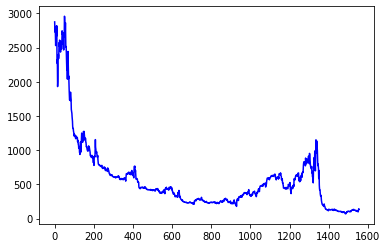

In [ ]:
plt.plot(train1['Close'],color='blue')


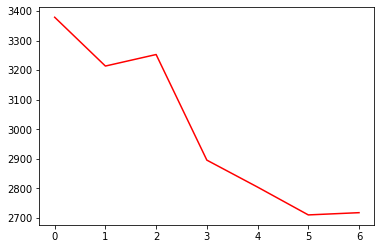

In [ ]:
plt.plot(test1['Close'],color='red')

In [ ]:
train1.isnull().sum()

Date          1
Open          1
High          1
Low           1
Close         1
Volume        1
Market Cap    1
dtype: int64

In [ ]:
train1

,Date,Open,High,Low,Close,Volume,Market Cap
1556,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1555,2013-04-28,135.30,135.98,132.10,134.21,"2,26,72,000","1,50,05,20,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,"2,28,77,200","1,49,11,60,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,"2,62,72,600","1,59,77,80,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,"2,31,46,600","1,54,28,20,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"


In [ ]:
train1['Close']=train1['Close'].fillna(0)

In [ ]:
train1

,Date,Open,High,Low,Close,Volume,Market Cap
1556,NaT,NaN,NaN,NaN,0.00,NaN,NaN
1555,2013-04-28,135.30,135.98,132.10,134.21,"2,26,72,000","1,50,05,20,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,"2,28,77,200","1,49,11,60,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,"2,62,72,600","1,59,77,80,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,"2,31,46,600","1,54,28,20,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"


In [ ]:
train1.isnull().sum()

Date          1
Open          1
High          1
Low           1
Close         0
Volume        1
Market Cap    1
dtype: int64

In [ ]:
train1

,Date,Close
1556,NaT,0.00
1555,2013-04-28,134.21
1554,2013-04-29,144.54
1553,2013-04-30,139.00
1552,2013-05-01,116.99
...,...,...
4,2017-07-27,2671.78
3,2017-07-28,2809.01
2,2017-07-29,2726.45
1,2017-07-30,2757.18


In [ ]:
train1=train1.set_index('Date')

In [ ]:
train1

,Close
Date,
NaT,0.00
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
...,...
2017-07-27,2671.78
2017-07-28,2809.01
2017-07-29,2726.45


In [ ]:
train1.drop(train1.index('1556'))

TypeError: ignored

In [ ]:
x_train=[]
y_train=[]
for i in range(60,1556):
  x_train.append(train1[i-60:i,0])
  y_train.append(train1[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(units=25,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=15,return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(units=5))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
history=model.fit(x_train,y_train,epochs=10,batch_size=21)

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
total=pd.concat((train['Close'],test['Close']),axis=0)
inputs=total[len(total)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=ms.transform(inputs)

In [ ]:
inputs.shape

In [ ]:
x_test=[]
for i in range(60,67):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
x_test.shape

In [ ]:
pred= model.predict(x_test)
pred= ms.inverse_transform(pred)
pred=pd.DataFrame(pred)
pred

In [ ]:
plt.plot(pred,color='red')

In [ ]:
aa=plt.plot(test['Close'],color='blue')
aa

In [ ]:
plt.plot(test['Close'],color='blue')
plt.plot(pred,color='red')
plt.show()

In [ ]:
model.summary()